<a href="https://colab.research.google.com/github/YouJoohyung/myfirst-project/blob/master/00_CNN_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%B5%9C%EC%A2%85_220819.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 변수의 shape, type, value 확인
def p(var) :
    if type(var)!=type([]):
        try: 
            print(f'Shape:{var.shape}')
        except : 
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from IPython import display

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

keras.__version__

'2.8.0'

# **평가 과제** : CNN Model 최적화 실습

## 과제1 : 기준모델 성능 확인    
* 다음 기준 모델에 CIFAR-10 Dataset을 적용하여  
* 학습 후 최고 Accuracy를 확인하고,   
* Train, Validation Accuracy와 Loss를 Plotting 하자 


In [ ]:
data_set = tf.keras.datasets.cifar10         # Color,(RGB)3chnnel 

(x_train, y_train), (x_test, y_test) = data_set.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


170508288/170498071 [==============================] - 2s 0us/step


#### 기준 모델

In [ ]:
def model_cnn_batchnormal():
    model = tf.keras.models.Sequential()
    # conv 1
    model.add(Conv2D(64,3,padding='same',input_shape=(32,32,3))) 
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # conv 2
    model.add(Conv2D(64, 3, padding='same'))
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # dense layers
    model.add(Flatten(name='flatten'))
    model.add(Dense(1000, activation='relu',name='dense_256'))
    model.add(Dense(10, activation='softmax', name='dense_10'))
    return model

model_BN=model_cnn_batchnormal()
#model_BN.summary()

In [ ]:
model_BN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# model_BN.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

In [ ]:
%%time
# epoch_n = 10
epoch_n = 10
batch_size = 512
history_BN = model_BN.fit(x_train, y_train, 
                        epochs=epoch_n,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/10
98/98 [==============================] - 4s 46ms/step - loss: 1.4293 - acc: 0.4837 - val_loss: 3.1519 - val_acc: 0.1129
Epoch 2/10
98/98 [==============================] - 4s 43ms/step - loss: 1.2112 - acc: 0.5665 - val_loss: 2.9065 - val_acc: 0.1151
Epoch 3/10
98/98 [==============================] - 4s 43ms/step - loss: 1.0772 - acc: 0.6187 - val_loss: 2.4077 - val_acc: 0.2149
Epoch 4/10
98/98 [==============================] - 4s 43ms/step - loss: 0.9704 - acc: 0.6572 - val_loss: 1.9504 - val_acc: 0.3831
Epoch 5/10
98/98 [==============================] - 4s 43ms/step - loss: 0.8839 - acc: 0.6899 - val_loss: 1.5669 - val_acc: 0.4672
Epoch 6/10
98/98 [==============================] - 4s 43ms/step - loss: 0.8342 - acc: 0.7076 - val_loss: 1.1531 - val_acc: 0.5983
Epoch 7/10
98/98 [==============================] - 4s 43ms/step - loss: 0.7759 - acc: 0.7289 - val_loss: 1.0642 - val_acc: 0.6335
Epoch 8/10
98/98 [==============================] - 4s 43ms/step - loss: 0.7498 - a

In [ ]:
print('\t',np.max(history_BN.history['val_acc']))

	 0.6783000230789185


In [ ]:
history_BN.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

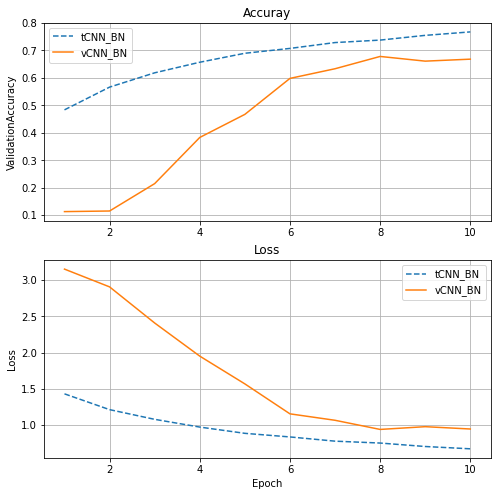

In [ ]:
loss = history_BN.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history_BN.history['acc'], '--', label='tCNN_BN')
plt.plot(epochs, history_BN.history['val_acc'], '-', label='vCNN_BN')
plt.grid(True)
plt.ylabel('ValidationAccuracy')
# plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history_BN.history['loss'], '--', label='tCNN_BN')
plt.plot(epochs, history_BN.history['val_loss'], '-', label='vCNN_BN')

plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.semilogy()
# plt.ylim([0.0, 1])
plt.legend(loc='best')
plt.show()


## 과제2 : 성능 개선 

**기준 모델을 수정하여 성능을 높여보자**  
주요 수정 사항  
1) Conv Layer의 수 및 각각의 node수  
2) BN Layer의 유무  
3) Dropout Layer의 유무 및 rate   
4) Dense(1000)의 유무, node 수  
**기준모델과 성능을 비교하여 설명해 보자**   


In [ ]:
# 2) BN Layer의 유무  
def model_cnn_batchnormal_2():
    model = tf.keras.models.Sequential()
    # conv 1
    model.add(Conv2D(64,3,padding='same',input_shape=(32,32,3))) 
    # model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # conv 2
    model.add(Conv2D(64, 3, padding='same'))
    # model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # dense layers
    model.add(Flatten(name='flatten'))
    model.add(Dense(1000, activation='relu',name='dense_256'))
    model.add(Dense(10, activation='softmax', name='dense_10'))
    return model

model_BN_2=model_cnn_batchnormal_2()
#model_BN.summary()

In [ ]:
# 3) Dropout Layer의 유무 및 rate
def model_cnn_batchnormal_3():
    model = tf.keras.models.Sequential()
    # conv 1
    model.add(Conv2D(64,3,padding='same',input_shape=(32,32,3))) 
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    # model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # conv 2
    model.add(Conv2D(64, 3, padding='same'))
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    # model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # dense layers
    model.add(Flatten(name='flatten'))
    model.add(Dense(1000, activation='relu',name='dense_256'))
    model.add(Dense(10, activation='softmax', name='dense_10'))
    return model

model_BN_3=model_cnn_batchnormal_3()
#model_BN.summary()


In [ ]:
# 4) Dense(1000)의 유무, node 수
def model_cnn_batchnormal_4():
    model = tf.keras.models.Sequential()
    # conv 1
    model.add(Conv2D(64,3,padding='same',input_shape=(32,32,3))) 
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # conv 2
    model.add(Conv2D(64, 3, padding='same'))
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # dense layers
    model.add(Flatten(name='flatten'))
    # model.add(Dense(1000, activation='relu',name='dense_256'))
    model.add(Dense(10, activation='softmax', name='dense_10'))
    return model

model_BN_4=model_cnn_batchnormal_4()
#model_BN.summary()

In [ ]:
#1 Conv Layer 추가, Dense는 제외함
def model_cnn_batchnormal_1():
    model = tf.keras.models.Sequential()
    # conv 1
    model.add(Conv2D(64,3,padding='same',input_shape=(32,32,3))) 
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # conv 2
    model.add(Conv2D(64, 3, padding='same'))
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # conv 2
    model.add(Conv2D(64, 3, padding='same'))
    model.add(BatchNormalization())             
    model.add(layers.ReLU())
    model.add(Dropout(rate=0.2))                        
    model.add(MaxPool2D())
    # dense layers
    model.add(Flatten(name='flatten'))
    # model.add(Dense(1000, activation='relu',name='dense_256'))
    model.add(Dense(10, activation='softmax', name='dense_10'))
    return model

model_BN_1=model_cnn_batchnormal_1()
#model_BN.summary()

In [ ]:
model_BN_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
epoch_n = 30
history_BN1 = model_BN_1.fit(x_train, y_train, 
                        epochs=epoch_n,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/30
98/98 [==============================] - 5s 48ms/step - loss: 1.6178 - acc: 0.4290 - val_loss: 2.6872 - val_acc: 0.1000
Epoch 2/30
98/98 [==============================] - 4s 44ms/step - loss: 1.1849 - acc: 0.5805 - val_loss: 3.1111 - val_acc: 0.1001
Epoch 3/30
98/98 [==============================] - 4s 45ms/step - loss: 1.0177 - acc: 0.6451 - val_loss: 2.8757 - val_acc: 0.1094
Epoch 4/30
98/98 [==============================] - 4s 44ms/step - loss: 0.9219 - acc: 0.6778 - val_loss: 2.3545 - val_acc: 0.2598
Epoch 5/30
98/98 [==============================] - 4s 44ms/step - loss: 0.8609 - acc: 0.6992 - val_loss: 1.9647 - val_acc: 0.3544
Epoch 6/30
98/98 [==============================] - 4s 44ms/step - loss: 0.8017 - acc: 0.7193 - val_loss: 1.4373 - val_acc: 0.4818
Epoch 7/30
98/98 [==============================] - 4s 44ms/step - loss: 0.7570 - acc: 0.7350 - val_loss: 1.0532 - val_acc: 0.6442
Epoch 8/30
98/98 [==============================] - 4s 44ms/step - loss: 0.7177 - a

In [ ]:
model_BN_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
epoch_n = 30
history_BN2 = model_BN_2.fit(x_train, y_train, 
                        epochs=epoch_n,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/30
98/98 [==============================] - 4s 41ms/step - loss: 1.6376 - acc: 0.4137 - val_loss: 1.3975 - val_acc: 0.5243
Epoch 2/30
98/98 [==============================] - 4s 38ms/step - loss: 1.2095 - acc: 0.5726 - val_loss: 1.1943 - val_acc: 0.6015
Epoch 3/30
98/98 [==============================] - 4s 38ms/step - loss: 1.0551 - acc: 0.6301 - val_loss: 1.0854 - val_acc: 0.6454
Epoch 4/30
98/98 [==============================] - 4s 38ms/step - loss: 0.9453 - acc: 0.6698 - val_loss: 1.0021 - val_acc: 0.6666
Epoch 5/30
98/98 [==============================] - 4s 38ms/step - loss: 0.8791 - acc: 0.6943 - val_loss: 0.9396 - val_acc: 0.6868
Epoch 6/30
98/98 [==============================] - 4s 38ms/step - loss: 0.7976 - acc: 0.7242 - val_loss: 0.9239 - val_acc: 0.6926
Epoch 7/30
98/98 [==============================] - 4s 39ms/step - loss: 0.7449 - acc: 0.7404 - val_loss: 0.8955 - val_acc: 0.6928
Epoch 8/30
98/98 [==============================] - 4s 42ms/step - loss: 0.6685 - a

In [ ]:
model_BN_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
epoch_n = 30
history_BN3 = model_BN_3.fit(x_train, y_train, 
                        epochs=epoch_n,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/30
98/98 [==============================] - 4s 40ms/step - loss: 2.7993 - acc: 0.3224 - val_loss: 2.6170 - val_acc: 0.1081
Epoch 2/30
98/98 [==============================] - 3s 36ms/step - loss: 1.4196 - acc: 0.4894 - val_loss: 3.4742 - val_acc: 0.1157
Epoch 3/30
98/98 [==============================] - 3s 35ms/step - loss: 1.2010 - acc: 0.5682 - val_loss: 3.6994 - val_acc: 0.1358
Epoch 4/30
98/98 [==============================] - 3s 34ms/step - loss: 1.0391 - acc: 0.6310 - val_loss: 2.3879 - val_acc: 0.2622
Epoch 5/30
98/98 [==============================] - 4s 36ms/step - loss: 0.9296 - acc: 0.6717 - val_loss: 1.5432 - val_acc: 0.4555
Epoch 6/30
98/98 [==============================] - 3s 34ms/step - loss: 0.8542 - acc: 0.7014 - val_loss: 1.3648 - val_acc: 0.5233
Epoch 7/30
98/98 [==============================] - 3s 34ms/step - loss: 0.7917 - acc: 0.7234 - val_loss: 0.9535 - val_acc: 0.6655
Epoch 8/30
98/98 [==============================] - 3s 34ms/step - loss: 0.7468 - a

In [ ]:
model_BN_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
epoch_n = 30
history_BN4 = model_BN_4.fit(x_train, y_train, 
                        epochs=epoch_n,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/30
98/98 [==============================] - 4s 43ms/step - loss: 1.2191 - acc: 0.5685 - val_loss: 3.1886 - val_acc: 0.1153
Epoch 2/30
98/98 [==============================] - 4s 41ms/step - loss: 1.0633 - acc: 0.6279 - val_loss: 2.7127 - val_acc: 0.1910
Epoch 3/30
98/98 [==============================] - 4s 41ms/step - loss: 0.9757 - acc: 0.6610 - val_loss: 2.2618 - val_acc: 0.2986
Epoch 4/30
98/98 [==============================] - 4s 41ms/step - loss: 0.9118 - acc: 0.6837 - val_loss: 1.6121 - val_acc: 0.4728
Epoch 5/30
98/98 [==============================] - 4s 41ms/step - loss: 0.8649 - acc: 0.6991 - val_loss: 1.1440 - val_acc: 0.5996
Epoch 6/30
98/98 [==============================] - 4s 41ms/step - loss: 0.8395 - acc: 0.7064 - val_loss: 1.2578 - val_acc: 0.5582
Epoch 7/30
98/98 [==============================] - 4s 41ms/step - loss: 0.7942 - acc: 0.7242 - val_loss: 0.9379 - val_acc: 0.6816
Epoch 8/30
98/98 [==============================] - 4s 41ms/step - loss: 0.7846 - a

In [ ]:
print('\t',np.max(history_BN.history['val_acc']))
print('\t',np.max(history_BN1.history['val_acc']))
print('\t',np.max(history_BN2.history['val_acc']))
print('\t',np.max(history_BN3.history['val_acc']))
print('\t',np.max(history_BN4.history['val_acc']))

# 0) 기준 모델 67.8%
# 1) Conv Layer 추가 (2->3) + Dense(1000) 제거 (Best임) 74.8%
# 2) BN Layer 제거 (2등) 73.9%
# 3) Dropout Layer의 제거 73.0%
# 4) Dense(1000)의 제거 72.6%


	 0.6783000230789185
	 0.7477999925613403
	 0.7394999861717224
	 0.7297000288963318
	 0.7263000011444092


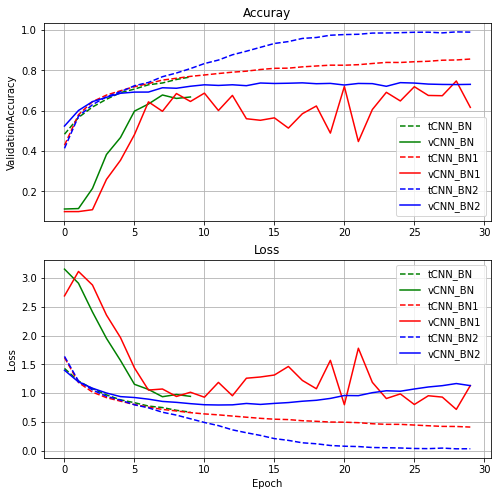

In [ ]:
loss = history_BN.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(history_BN.history['acc'], 'g--', label='tCNN_BN')
plt.plot(history_BN.history['val_acc'], 'g', label='vCNN_BN')
plt.plot(history_BN1.history['acc'], 'r--', label='tCNN_BN1')
plt.plot(history_BN1.history['val_acc'], 'r', label='vCNN_BN1')
plt.plot(history_BN2.history['acc'], 'b--', label='tCNN_BN2')
plt.plot(history_BN2.history['val_acc'], 'b', label='vCNN_BN2')
plt.grid(True)
plt.ylabel('ValidationAccuracy')
#plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(history_BN.history['loss'], 'g--', label='tCNN_BN')
plt.plot(history_BN.history['val_loss'], 'g', label='vCNN_BN')
plt.plot(history_BN1.history['loss'], 'r--', label='tCNN_BN1')
plt.plot(history_BN1.history['val_loss'], 'r', label='vCNN_BN1')
plt.plot(history_BN2.history['loss'], 'b--', label='tCNN_BN2')
plt.plot(history_BN2.history['val_loss'], 'b', label='vCNN_BN2')

plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.semilogy()
#plt.ylim([0.0, 1])
plt.legend(loc='best')
plt.show()


## 과제3 : Feature Maps 확인

* 과제2에서 학습된 모델에서  
* 모든 Conv Layer의 Feature Map을 시각화 해보자  
* 첫번째 MaxPool2D layer 입출력 Feature Map을 시각화 해보자 

 Filter Plotting

In [ ]:
# summarize filter shapes
filter_list_best = []
for i,layer in enumerate(model_BN.layers):
    # check for convolutional layer
    if 'conv' not in layer.name: 
        continue #'conv'가 포함되지 않으면 skip
    # get filter weights
    filters = layer.get_weights()
    filter_list.append(filters[0]) #use_bias=False
    print(f'[{i}]th layer:{layer.name}  {filters[0].shape}')

[0]th layer:conv2d_4  (3, 3, 3, 64)
[5]th layer:conv2d_5  (3, 3, 64, 64)


In [ ]:
# plot n x n images
def square(imgs, n):
    img_num = n
    plt.figure(figsize=(10,10))
    print(f'min[{np.min(imgs):2.2f}],max[{np.max(imgs):2.2f}]')
    f_min, f_max = imgs.min(), imgs.max() #(3,3,64,64)
    imgs = (imgs - f_min) / (f_max - f_min) 
    for i in range(n):
        for j in range(n):
            p_num = i*n + j         
            ax = plt.subplot(n, n, p_num+1)#(row,col,index)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(imgs[:, :, p_num], cmap='gray')
    plt.show()

In [ ]:
model_BN.layers[1].output

<KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'batch_normalization_4')>

In [ ]:
# model_BN의 12레이어 중에 일부 레이처 출력을 추출하는 모델 
ex_l = [1, 5, 9]  # 추출할 레이어 지정 
# model_BN.layers.output : tensor data 
layer_outputs = [model_BN.layers[i].output for i in ex_l]

### 새로운 모델 생성, 
# 기존 모델의 parameter까지 copy,
# compile하면 안됨(parameter 초기화됨)
# 기존모델과 독립된 새로운 모델
fm_model = Model(inputs=model_BN.input, outputs=layer_outputs)   

#fm_model.summary()
#keras.utils.plot_model(fm_model,show_layer_names=True,show_shapes=True)  

In [ ]:
# Returns a list of five Numpy arrays of layer activation
n=0 # 첫번째 이미지를 넣고 추론하면서, feature를 반환 받음
#[(1,28,28,64),(1,14,14,64),(1,7,7,64)]
feature_maps = fm_model.predict(x_test[n:n+1,:]) 
layers_names = fm_model.output_names 

max_pooling2d_5
min[0.00],max[0.43]


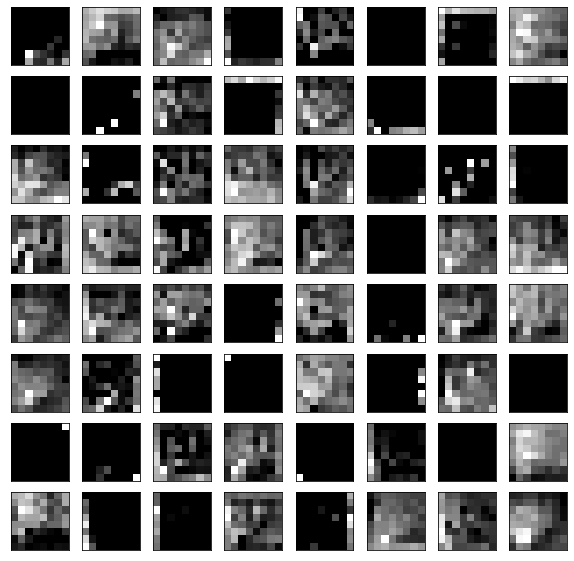

In [ ]:
print(layers_names[2])
square(feature_maps[2][0], 8)

In [ ]:
# 과제2. Best 모델의 Feature Map 확인

In [ ]:
# summarize filter shapes
filter_list_best = []
for i,layer in enumerate(model_BN_1.layers):
    # check for convolutional layer
    if 'conv' not in layer.name: 
        continue #'conv'가 포함되지 않으면 skip
    # get filter weights
    filters = layer.get_weights()
    filter_list_best.append(filters[0]) #use_bias=False
    print(f'[{i}]th layer:{layer.name}  {filters[0].shape}')

model_BN_1.layers[1].output  

[0]th layer:conv2d_14  (3, 3, 3, 64)
[5]th layer:conv2d_15  (3, 3, 64, 64)
[10]th layer:conv2d_16  (3, 3, 64, 64)


<KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'batch_normalization_12')>

In [ ]:
# model_BN의 12레이어 중에 일부 레이처 출력을 추출하는 모델 
ex_l = [1, 5, 9]  # 추출할 레이어 지정 
# model_BN.layers.output : tensor data 
layer_outputs_best = [model_BN_1.layers[i].output for i in ex_l]

### 새로운 모델 생성, 
# 기존 모델의 parameter까지 copy,
# compile하면 안됨(parameter 초기화됨)
# 기존모델과 독립된 새로운 모델
fm_model_best = Model(inputs=model_BN_1.input, outputs=layer_outputs_best)   

#fm_model.summary()
#keras.utils.plot_model(fm_model,show_layer_names=True,show_shapes=True)  



In [ ]:
# Returns a list of five Numpy arrays of layer activation
n=0 # 첫번째 이미지를 넣고 추론하면서, feature를 반환 받음
#[(1,28,28,64),(1,14,14,64),(1,7,7,64)]
feature_maps = fm_model_best.predict(x_test[n:n+1,:]) 
layers_names = fm_model_best.output_names 

max_pooling2d_15
min[0.00],max[3.42]


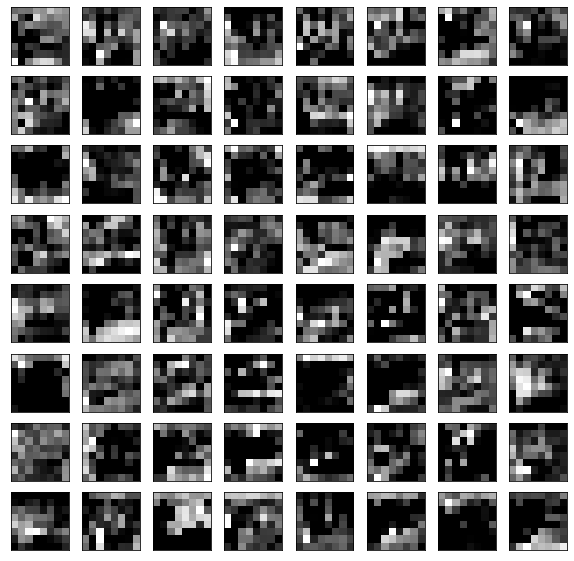

In [ ]:
# 뭔가 더 지저분함..
print(layers_names[2])
square(feature_maps[2][0], 8)

## 과제4: learning rate schedule 적용


* epochs를 100까지 늘리고 
* decay_steps와 decay_rate를 수정하여    
* 학습이 안정적으로 종료되도록 하자  

- ManualDecay / ExponentialDecay

In [ ]:
## Exponential decay scheduler
starter_learning_rate = 0.001 #0.01
decay_steps = 20  #10
decay_rate=0.3  #0.7 밑에 코드가 이미 있군요.. 감사합니다 ㅎㅎ
def ExponentialDecay(step,staircase=True):
    if staircase :
        return starter_learning_rate * decay_rate ** (step // decay_steps)
    return starter_learning_rate * decay_rate ** (step / decay_steps)

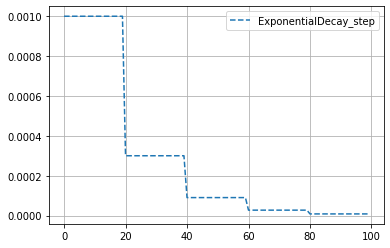

In [ ]:
starter_learning_rate = 0.001
decay_steps = 20
decay_rate=0.3
epochs=100
lr_s=[]
for step in range(epochs):
    lr_s.append(ExponentialDecay(step))

plt.plot(lr_s, linestyle='--', label="ExponentialDecay_step")
plt.legend()
plt.grid()
plt.show()

In [ ]:
## 초기 기준 모델 base로 (BN)
## lr Expo. Decay 모델 적용한 결과임. (BN3)

model_BN3=model_cnn_batchnormal()

In [ ]:
model_BN3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
epoch_n = 30
batch_n = 512

my_callbacks = [keras.callbacks.LearningRateScheduler(ExponentialDecay)]

history_BN3 = model_BN3.fit(x_train, y_train, 
                        shuffle=True,
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        callbacks=my_callbacks,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/30
98/98 [==============================] - 5s 49ms/step - loss: 2.9955 - acc: 0.3301 - val_loss: 2.6978 - val_acc: 0.1127 - lr: 0.0010
Epoch 2/30
98/98 [==============================] - 4s 45ms/step - loss: 1.4154 - acc: 0.4889 - val_loss: 3.3369 - val_acc: 0.0999 - lr: 0.0010
Epoch 3/30
98/98 [==============================] - 4s 44ms/step - loss: 1.2143 - acc: 0.5655 - val_loss: 3.4456 - val_acc: 0.1004 - lr: 0.0010
Epoch 4/30
98/98 [==============================] - 4s 44ms/step - loss: 1.0816 - acc: 0.6150 - val_loss: 2.6736 - val_acc: 0.1581 - lr: 0.0010
Epoch 5/30
98/98 [==============================] - 4s 43ms/step - loss: 0.9609 - acc: 0.6598 - val_loss: 2.0345 - val_acc: 0.2862 - lr: 0.0010
Epoch 6/30
98/98 [==============================] - 4s 43ms/step - loss: 0.8835 - acc: 0.6922 - val_loss: 1.3605 - val_acc: 0.5347 - lr: 0.0010
Epoch 7/30
98/98 [==============================] - 4s 43ms/step - loss: 0.8202 - acc: 0.7133 - val_loss: 1.1622 - val_acc: 0.5908 - lr:

In [ ]:
print('\t',np.max(history_BN2.history['val_acc']))
print('\t',np.max(history_BN3.history['val_acc']))

	 0.7267000079154968
	 0.7580999732017517


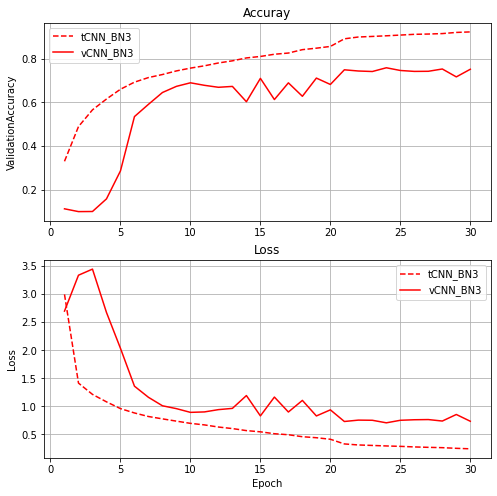

In [ ]:
loss = history_BN3.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Accuray')

plt.plot(history_BN.history['acc'], 'g--', label='tCNN_BN2')
plt.plot(history_BN.history['val_acc'], 'g', label='vCNN_BN2')
plt.plot(history_BN3.history['acc'], 'r--', label='tCNN_BN3')
plt.plot(history_BN3.history['val_acc'], 'r', label='vCNN_BN3')
plt.grid(True)
plt.ylabel('ValidationAccuracy')
#plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(history_BN.history['loss'], 'g--', label='tCNN_BN2')
plt.plot(history_BN.history['val_loss'], 'g', label='vCNN_BN2')
plt.plot(history_BN3.history['loss'], 'r--', label='tCNN_BN3')
plt.plot(history_BN3.history['val_loss'], 'r', label='vCNN_BN3')

plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.semilogy()
#plt.ylim([0.0, 1])
plt.legend(loc='best')
plt.show()


In [ ]:
## 초기 기준 모델 base로 (BN)
## lr Expo. Decay 모델 적용한 결과임. (BN3)
## best 조건 기반, Ir 모델 적용 (BN1_best)

model_BN1_best=model_cnn_batchnormal_1()

In [ ]:
model_BN1_best.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
%%time
epoch_n = 100

my_callbacks = [keras.callbacks.LearningRateScheduler(ExponentialDecay)]

history_BN1_best = model_BN1_best.fit(x_train, y_train, 
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        callbacks=my_callbacks,
                        validation_data=(x_test, y_test)
                        )

Epoch 1/100
98/98 [==============================] - 5s 48ms/step - loss: 1.6143 - acc: 0.4349 - val_loss: 2.7554 - val_acc: 0.1000 - lr: 0.0010
Epoch 2/100
98/98 [==============================] - 4s 44ms/step - loss: 1.1914 - acc: 0.5759 - val_loss: 3.1363 - val_acc: 0.0999 - lr: 0.0010
Epoch 3/100
98/98 [==============================] - 4s 44ms/step - loss: 1.0308 - acc: 0.6380 - val_loss: 2.8893 - val_acc: 0.1080 - lr: 0.0010
Epoch 4/100
98/98 [==============================] - 5s 51ms/step - loss: 0.9360 - acc: 0.6717 - val_loss: 2.1021 - val_acc: 0.2619 - lr: 0.0010
Epoch 5/100
98/98 [==============================] - 5s 47ms/step - loss: 0.8533 - acc: 0.7038 - val_loss: 1.8098 - val_acc: 0.3105 - lr: 0.0010
Epoch 6/100
98/98 [==============================] - 4s 46ms/step - loss: 0.8090 - acc: 0.7218 - val_loss: 1.4789 - val_acc: 0.4406 - lr: 0.0010
Epoch 7/100
98/98 [==============================] - 4s 45ms/step - loss: 0.7640 - acc: 0.7358 - val_loss: 1.3206 - val_acc: 0.537

In [ ]:
print('\t',np.max(history_BN.history['val_acc']))
print('\t',np.max(history_BN3.history['val_acc']))
print('\t',np.max(history_BN1_best.history['val_acc']))

	 0.6783000230789185
	 0.7297000288963318
	 0.7520999908447266


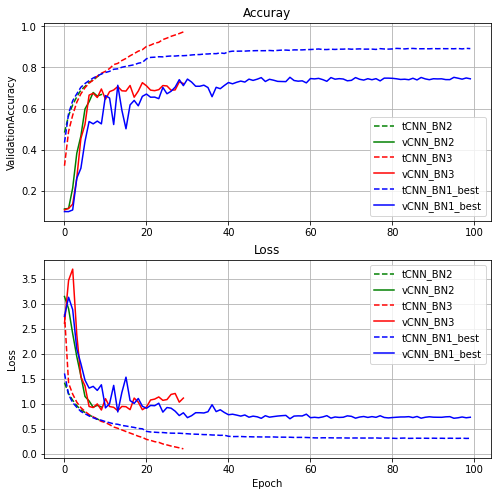

In [ ]:
loss = history_BN3.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Accuray')

plt.plot(history_BN.history['acc'], 'g--', label='tCNN_BN2')
plt.plot(history_BN.history['val_acc'], 'g', label='vCNN_BN2')
plt.plot(history_BN3.history['acc'], 'r--', label='tCNN_BN3')
plt.plot(history_BN3.history['val_acc'], 'r', label='vCNN_BN3')
plt.plot(history_BN1_best.history['acc'], 'b--', label='tCNN_BN1_best')
plt.plot(history_BN1_best.history['val_acc'], 'b', label='vCNN_BN1_best')

plt.grid(True)
plt.ylabel('ValidationAccuracy')
#plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(history_BN.history['loss'], 'g--', label='tCNN_BN2')
plt.plot(history_BN.history['val_loss'], 'g', label='vCNN_BN2')
plt.plot(history_BN3.history['loss'], 'r--', label='tCNN_BN3')
plt.plot(history_BN3.history['val_loss'], 'r', label='vCNN_BN3')
plt.plot(history_BN1_best.history['loss'], 'b--', label='tCNN_BN1_best')
plt.plot(history_BN1_best.history['val_loss'], 'b', label='vCNN_BN1_best')


plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.semilogy()
#plt.ylim([0.0, 1])
plt.legend(loc='best')
plt.show()
